# Heart Disease Prediction

Heart Disease is a major cause of death in United States. According to CDC, about 647,000 Americans die from heart disease <br> every year. High blood pressure, High blood cholesterol and Smoking are considered as the main risk factors for heart disease.<br>Since there are many factors influencing the heart disease, predicting it is difficult. But an enormous amount of clinical data <br> is available for predicting heart disease. Applying Machine Learning algorithms on these data can help us predict heart disease <br> at an early stage and save people from fatality.

**“I aim to predict heart disease using different machine learning models, provide a comparative study of their performance <br> and optimize the models for better performance”**

Dataset: **'Heart Disease Data Set'** from UCI Machine Learning Repository

Models: Random Forest, Support Vector Machine, Naive Bayes, Decision Tree, Logistic Regression and Neural Network

In [0]:
#importing dependent packages
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_selection import RFECV
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam,RMSprop,SGD
from keras.activations import relu

In [7]:
#loading the dataset
data = pd.read_csv('data.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [8]:
#displaying information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   cp         303 non-null    int64  
 3   trestbps   303 non-null    int64  
 4   chol       303 non-null    int64  
 5   fbs        303 non-null    int64  
 6   restecg    303 non-null    int64  
 7   thalach    303 non-null    int64  
 8   exang      303 non-null    int64  
 9   oldpeak    303 non-null    float64
 10  slope      303 non-null    int64  
 11  ca         299 non-null    float64
 12  thal       301 non-null    float64
 13  diagnosis  303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


# Data Preprocessing

Our dataset had 6 observations with null values in it. There are two remedies for null values, one is to remove the corresponding entries from the dataset and the second is to use a imputer and add mean values in those places. Since this is a clinical dataset, imputing mean values will result in less optimal results in future. So I removed those 6 entries from the dataset.

In [28]:
#checking number of null values
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           4
thal         2
diagnosis    0
dtype: int64

In [9]:
#removing rows with null values
ca = data.loc[data['ca'].isna()]
preprocessed = data.drop(ca.index)
thal = data.loc[data['thal'].isna()]
preprocessed = preprocessed.drop(thal.index)
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    float64
 12  thal       297 non-null    float64
 13  diagnosis  297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [10]:
#converting to a binary classification problem
preprocessed['diagnosis'] = np.where(preprocessed['diagnosis']==0,0,1)
class_names = preprocessed.diagnosis.unique()
preprocessed['diagnosis'].value_counts()

0    160
1    137
Name: diagnosis, dtype: int64

# Data Visualization

This is an important step before training. Visualizing our data helps us to understand our data better and to unravel issues like class imbalance early. I have used seaborn to present useful visualizations of the dataset. Visualizing the dataset ruled out the possibility of a class imbalance since there were equal number of positive and negative cases in the dataset.

Text(0.5, 1.0, 'Negative versus Positive')

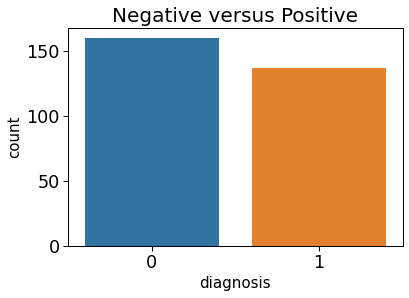

In [0]:
#comparing the number of positive cases and negative cases
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 20,"axes.labelsize": 15})
sns.countplot(preprocessed['diagnosis'])
plt.title('Negative versus Positive')

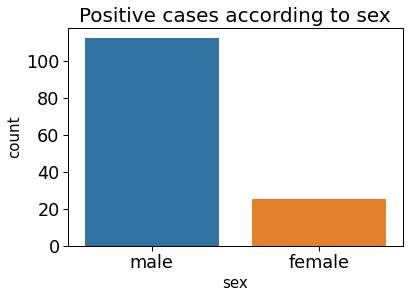

In [0]:
#comparing the number of positives cases based on gender
gender = preprocessed
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 20,"axes.labelsize": 15})
gender['sex'] = np.where(gender['sex']==0,'female','male')
gender = gender[gender['diagnosis']==1]
sns.countplot(x='sex',data = gender,order = gender['sex'].unique())
plt.title('Positive cases according to sex')
plt.show()
preprocessed['sex'] = np.where(preprocessed['sex']=='female',0,1)

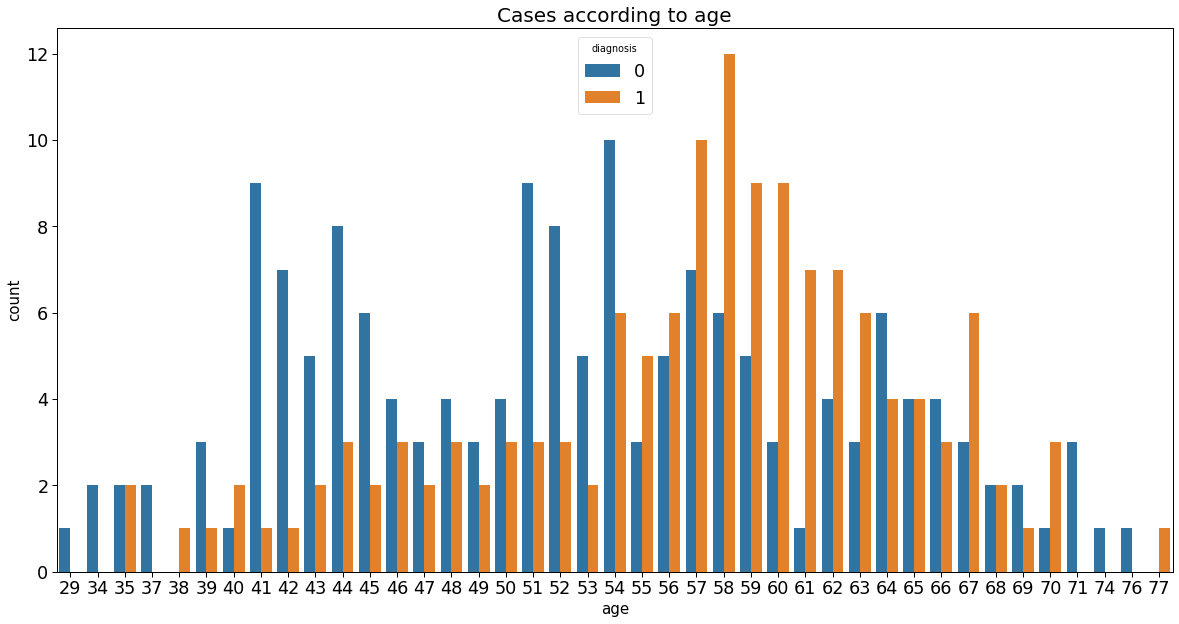

In [0]:
#giving a view of cases according to age
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 20,"axes.labelsize": 15})
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='age',hue='diagnosis',data = preprocessed,order = preprocessed['age'].sort_values().unique(),ax=ax)
plt.title('Cases according to age')
plt.show()

# Data Splitting

Since we can't get testing data out of the blue, we have to consolidate some entries from our dataset to testing and the rest to training the model. I have done a **80:20 split**. Scaling our data to a common range is said to optimize our results. I have used StandardScaler to scale the values in the training and testing dataset.

In [0]:
#splitting data into train and test data
X = preprocessed.drop('diagnosis',axis=1)
y = preprocessed['diagnosis']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

#applying standard scaler to training and testing data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Evaluation Tools

Evaluation of our model helps to gauge the performance of our model on unseen data. I have defined the common methods for displaying confusion matrix, classification report and accuracy score here. I will use this to evaluate all my models from here on.

In [0]:
#presenting confusion matrix in a more visually appealing manner
    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """Plots the confusion matrix in a visually appealing manner.

        arguments:
        cm -- normal confusion matrix
        normalize -- boolean to normalize or not
        title -- title of the plot
        cmap -- contains the color scheme
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
#evaluating models based on predictions given by them
def evaluate_model(prediction):
    """Evaluates the model.
    
        arguments:
        prediction -- contains the predictions made by a model
    """
  print(classification_report(y_test,prediction))
  cnf_matrix = confusion_matrix(y_test,prediction)
  np.set_printoptions(precision=2)
  plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
  print("Accuracy Score: %f" %(accuracy_score(y_test,prediction)))

# Random Forest Classifier

In [0]:
#training Random Forest Classifier and making prediction
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_predict[:20]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        31
           1       0.82      0.79      0.81        29

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60

Accuracy Score: 0.816667


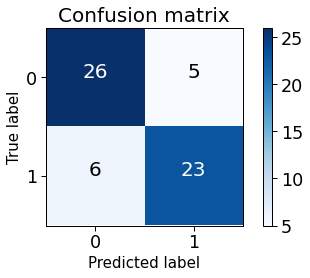

In [0]:
#evaluating Random Forest Classifier
evaluate_model(rfc_predict)

# Support Vector Machine

In [0]:
#training Support Vector Machine and making prediction
svmc = SVC()
svmc.fit(X_train,y_train)
svmc_predict = svmc.predict(X_test)
svmc_predict[:20]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.85      0.79      0.82        29

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

Accuracy Score: 0.833333


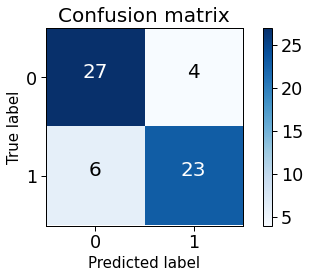

In [0]:
#evaluating Support Vector Machine Classifier
evaluate_model(svmc_predict)

# Decision Tree

In [0]:
#training Decision Tree Classifier and making prediction
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
dt_predict = decision_tree.predict(X_test)
dt_predict[:20]

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        31
           1       0.76      0.76      0.76        29

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60

Accuracy Score: 0.766667


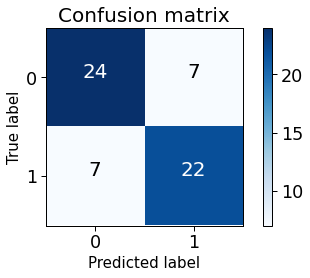

In [0]:
#evaluating Decision Tree Classifier
evaluate_model(dt_predict)

# Naive Bayes

In [0]:
#training Gaussian Naive Bayes and making prediction
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predict = nb.predict(X_test)
nb_predict[:20]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        31
           1       0.76      0.86      0.81        29

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60

Accuracy Score: 0.800000


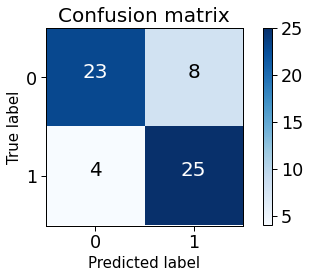

In [0]:
#evaluating Gaussian Naive Bayes Classifier
evaluate_model(nb_predict)

# Logistic Regression

In [0]:
#training Logistic Regression and making prediction
lr = LogisticRegression(max_iter=1000)
result = lr.fit(X_train,y_train)
lr_predict = lr.predict(X_test)
lr_predict[:20]

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        31
           1       0.92      0.79      0.85        29

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60

Accuracy Score: 0.866667


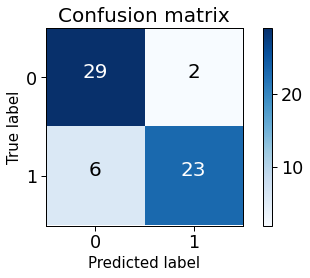

In [0]:
#evaluating Logistic Regression
evaluate_model(lr_predict)

# Final Verdict

After training and evaluating a bunch of non-deep learning folks, it is time to pick a winner out of the pack. The accuracy scores of these models range from **76.66** to **86.66**. Decision tree gave the least accuracy of 76.66% and Logistic Regression gave the highest accuracy of 86.66%. **Logistic Regression** seemed to have performed the best. 86.66% is the maximum we could get out of these folks. Next up we are going to train and evaluate the big guy "Neural Network". Let's see what we have got in store for us.

# Neural Network

We have experimented with non-deep learning models. Let us now switch to deep learning to do our task of classification. Artificial Neural Networks can be a great tool for classification problem. But we need to fine tune the model parameters to get the desired result. In the coming section, I have built a neural network using Keras. I will start with a minimal configuration and will keep tuning the parameters until we get the best prediction accuracy. Now let us witness how neural network performs.

Evaluation metrics for each step: Classification Report, Accuracy Score, Confusion Matrix, Loss Curve and Accuracy Curve

In [0]:
#defines create neural network model, plot loss and accuracy curves and build,run,evaluate & plot methods

def create_model( layers, opt=None ):
    """Creates a model, add layers, fix optimizer and then compiles the model.
    
        arguments:
        layers -- contains an array of layers
        opt -- contains the name of optimizer
    """
  model = Sequential()
  for layer in layers:
    model.add(layer)

  model.add( Dense( 1, activation="sigmoid") )

  if opt == 'Adam':
    opt = Adam()
  elif opt == 'RMSprop':
    opt = RMSprop()
  elif opt == 'SGD':
    opt = SGD()

  model.compile(optimizer=opt, loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'] )
  return model

def plot_history( m, h ):
    """Plots the loss and accuracy curve.
    
        arguments:
        m -- model
        h -- history which contains details about training
    """
  for n, metric in enumerate(m.metrics_names):
    fig = plt.figure(num=n)
    name = metric.replace("_"," ").capitalize()
    plt.plot(h.epoch,  h.history[metric], label='Train')
    plt.plot(h.epoch, h.history[metric],
             linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    else:
      plt.ylim([0,1])
    plt.title(name)
    plt.legend()
    plt.show()
    plt.close(fig)

def build_run_evaluate_plot(layers, optimizer=None, ep=100):
    """Builds a model, trains a model, make predictions and evaluates a model

        arguments:
        layers -- contains an array of layers
        optimizer -- contains the name of optimizer
        ep -- contains the number of epochs
    """
  mod = create_model(layers, optimizer)
  history = mod.fit(X_train,y_train,epochs=ep,batch_size=30)
  nn_predict = mod.predict(X_test)
  nn_predict = (nn_predict >= 0.5).astype("int32")
  evaluate_model(nn_predict)
  plot_history(mod,history)

**Step 1:** Single Hidden Layer, 26 Neurons, Optimizer Adam, Accuracy 78.33%

Epoch 1/100
237/237 [==============================] - 0s 1ms/step - loss: 0.6758 - accuracy: 0.6203
Epoch 2/100
237/237 [==============================] - 0s 56us/step - loss: 0.6258 - accuracy: 0.6709
Epoch 3/100
237/237 [==============================] - 0s 64us/step - loss: 0.5839 - accuracy: 0.7215
Epoch 4/100
237/237 [==============================] - 0s 55us/step - loss: 0.5476 - accuracy: 0.7679
Epoch 5/100
237/237 [==============================] - 0s 59us/step - loss: 0.5218 - accuracy: 0.7806
Epoch 6/100
237/237 [==============================] - 0s 57us/step - loss: 0.4946 - accuracy: 0.7932
Epoch 7/100
237/237 [==============================] - 0s 58us/step - loss: 0.4767 - accuracy: 0.7975
Epoch 8/100
237/237 [==============================] - 0s 65us/step - loss: 0.4584 - accuracy: 0.8059
Epoch 9/100
237/237 [==============================] - 0s 59us/step - loss: 0.4444 - accuracy: 0.8101
Epoch 10/100
237/237 [==============================] - 0s 76us/step - loss: 0.4319

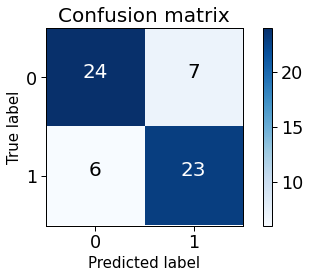

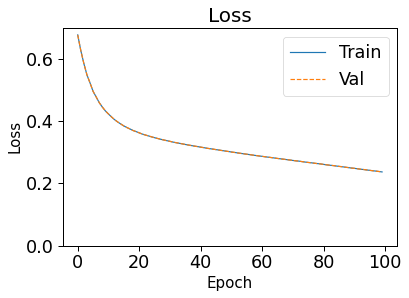

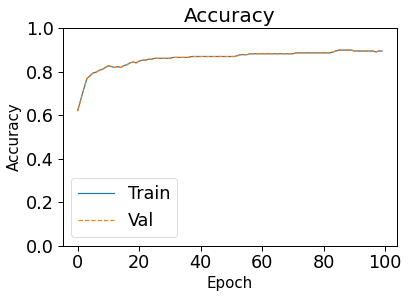

In [0]:
build_run_evaluate_plot( [ Dense(26, activation="relu", input_dim=13) ],'Adam')

Doubled the number of neurons to 52 <br>
**Step 2:** Single Hidden Layer, 52 Neurons, Optimizer Adam, Accuracy 75% <br>
**Result:** Accuracy reduced

Epoch 1/100
237/237 [==============================] - 0s 361us/step - loss: 0.7745 - accuracy: 0.4135
Epoch 2/100
237/237 [==============================] - 0s 56us/step - loss: 0.6927 - accuracy: 0.5527
Epoch 3/100
237/237 [==============================] - 0s 54us/step - loss: 0.6292 - accuracy: 0.6751
Epoch 4/100
237/237 [==============================] - 0s 52us/step - loss: 0.5756 - accuracy: 0.7511
Epoch 5/100
237/237 [==============================] - 0s 59us/step - loss: 0.5343 - accuracy: 0.7932
Epoch 6/100
237/237 [==============================] - 0s 66us/step - loss: 0.5031 - accuracy: 0.8101
Epoch 7/100
237/237 [==============================] - 0s 62us/step - loss: 0.4788 - accuracy: 0.8228
Epoch 8/100
237/237 [==============================] - 0s 56us/step - loss: 0.4577 - accuracy: 0.8143
Epoch 9/100
237/237 [==============================] - 0s 53us/step - loss: 0.4414 - accuracy: 0.8228
Epoch 10/100
237/237 [==============================] - 0s 55us/step - loss: 0.42

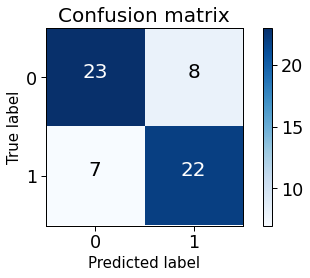

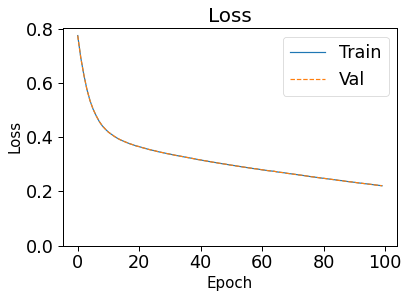

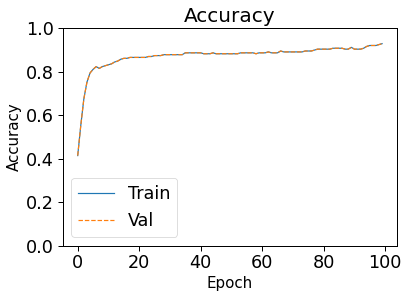

In [0]:
build_run_evaluate_plot( [ Dense(52, activation="relu", input_dim=13) ],'Adam')

Reduced number of neurons to 26 and added another hidden layer of 26 neurons <br>
**Step 3:** Two Hidden Layers, 26 Neurons each, Optimizer Adam, Accuracy 73.33% <br>
**Result:** Accuracy reduced

Epoch 1/100
237/237 [==============================] - 0s 463us/step - loss: 0.7000 - accuracy: 0.5148
Epoch 2/100
237/237 [==============================] - 0s 60us/step - loss: 0.6254 - accuracy: 0.6498
Epoch 3/100
237/237 [==============================] - 0s 53us/step - loss: 0.5635 - accuracy: 0.7468
Epoch 4/100
237/237 [==============================] - 0s 56us/step - loss: 0.5141 - accuracy: 0.8059
Epoch 5/100
237/237 [==============================] - 0s 54us/step - loss: 0.4771 - accuracy: 0.7975
Epoch 6/100
237/237 [==============================] - 0s 55us/step - loss: 0.4467 - accuracy: 0.8143
Epoch 7/100
237/237 [==============================] - 0s 60us/step - loss: 0.4240 - accuracy: 0.8186
Epoch 8/100
237/237 [==============================] - 0s 55us/step - loss: 0.4070 - accuracy: 0.8270
Epoch 9/100
237/237 [==============================] - 0s 60us/step - loss: 0.3933 - accuracy: 0.8354
Epoch 10/100
237/237 [==============================] - 0s 60us/step - loss: 0.38

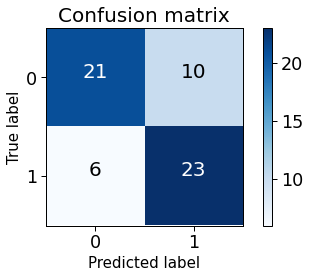

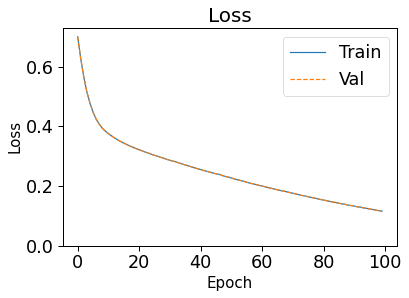

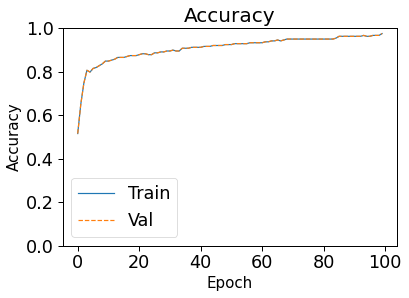

In [0]:
build_run_evaluate_plot( [ Dense(26, activation="relu", input_dim=13), Dense(26, activation="relu") ],'Adam')

Increasing the number of epochs to 200 from default 100 <br>
**Step 4:** Two Hidden Layers, 26 Neurons, Optimizer Adam, Epoch 200, Accuracy 73.33% <br>
**Result:** No Improvement

Epoch 1/200
237/237 [==============================] - 0s 448us/step - loss: 0.7087 - accuracy: 0.5359
Epoch 2/200
237/237 [==============================] - 0s 55us/step - loss: 0.6570 - accuracy: 0.6245
Epoch 3/200
237/237 [==============================] - 0s 54us/step - loss: 0.6137 - accuracy: 0.7257
Epoch 4/200
237/237 [==============================] - 0s 54us/step - loss: 0.5735 - accuracy: 0.7637
Epoch 5/200
237/237 [==============================] - 0s 55us/step - loss: 0.5407 - accuracy: 0.7932
Epoch 6/200
237/237 [==============================] - 0s 61us/step - loss: 0.5092 - accuracy: 0.8228
Epoch 7/200
237/237 [==============================] - 0s 55us/step - loss: 0.4826 - accuracy: 0.8270
Epoch 8/200
237/237 [==============================] - 0s 54us/step - loss: 0.4596 - accuracy: 0.8312
Epoch 9/200
237/237 [==============================] - 0s 54us/step - loss: 0.4384 - accuracy: 0.8354
Epoch 10/200
237/237 [==============================] - 0s 56us/step - loss: 0.42

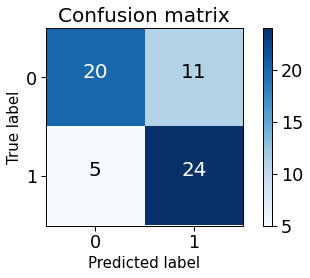

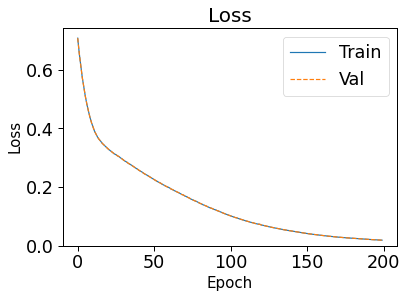

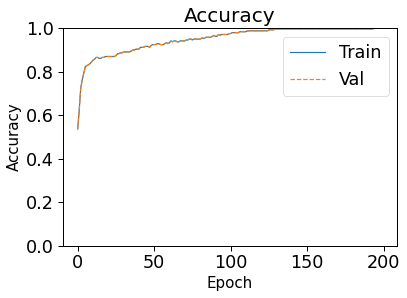

In [0]:
build_run_evaluate_plot( [ Dense(26, activation="relu", input_dim=13), Dense(26, activation="relu") ],'Adam',200)

In [0]:
From the last step, it is evident that model started to overfit on the training data. This is undesirable and will prevent model from generalizing to unseen data. Hence, we introduce **Dropout layers** from this step. Dropout is a technique used to prevent a model from overfitting. By using Dropout, some of the neurons are randomly selected and they are ignored during the forward and backward pass.

Adding a dropout layer with 30% neurons dropped out <br>
**Step 5:** Two Hidden Layers, 26 Neurons, Dropout 0.3, Optimizer Adam, Epoch 200, Accuracy 80% <br>
**Result:** Drastic Improvement of 6.67%

Epoch 1/200
237/237 [==============================] - 0s 566us/step - loss: 0.6161 - accuracy: 0.6920
Epoch 2/200
237/237 [==============================] - 0s 66us/step - loss: 0.5880 - accuracy: 0.6962
Epoch 3/200
237/237 [==============================] - 0s 66us/step - loss: 0.5458 - accuracy: 0.7679
Epoch 4/200
237/237 [==============================] - 0s 63us/step - loss: 0.4920 - accuracy: 0.7806
Epoch 5/200
237/237 [==============================] - 0s 63us/step - loss: 0.4748 - accuracy: 0.8017
Epoch 6/200
237/237 [==============================] - 0s 58us/step - loss: 0.4573 - accuracy: 0.8186
Epoch 7/200
237/237 [==============================] - 0s 56us/step - loss: 0.4352 - accuracy: 0.8228
Epoch 8/200
237/237 [==============================] - 0s 56us/step - loss: 0.4232 - accuracy: 0.8312
Epoch 9/200
237/237 [==============================] - 0s 61us/step - loss: 0.4138 - accuracy: 0.8101
Epoch 10/200
237/237 [==============================] - 0s 63us/step - loss: 0.40

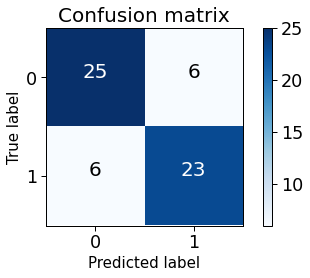

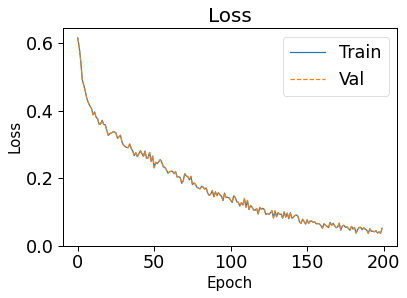

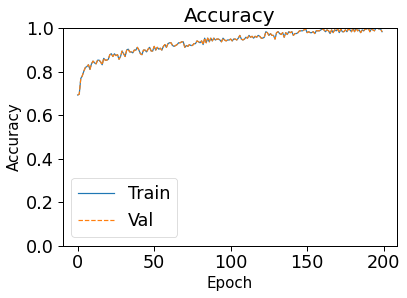

In [0]:
build_run_evaluate_plot( [ Dense(26, activation="relu", input_dim=13), Dense(26, activation="relu"), Dropout(0.3) ],'Adam',200)

Increasing the dropouts to 50% <br>
**Step 6:** Two Hidden Layers, 26 Neurons, Dropout 0.5, Optimizer Adam, Epoch 200, Accuracy 83.33% <br>
**Result:** Improvement of 3.33%

Epoch 1/200
237/237 [==============================] - 0s 580us/step - loss: 0.7159 - accuracy: 0.4979
Epoch 2/200
237/237 [==============================] - 0s 60us/step - loss: 0.6516 - accuracy: 0.5907
Epoch 3/200
237/237 [==============================] - 0s 59us/step - loss: 0.6358 - accuracy: 0.6414
Epoch 4/200
237/237 [==============================] - 0s 71us/step - loss: 0.6070 - accuracy: 0.6582
Epoch 5/200
237/237 [==============================] - 0s 63us/step - loss: 0.6111 - accuracy: 0.6878
Epoch 6/200
237/237 [==============================] - 0s 61us/step - loss: 0.5276 - accuracy: 0.7848
Epoch 7/200
237/237 [==============================] - 0s 63us/step - loss: 0.5205 - accuracy: 0.7890
Epoch 8/200
237/237 [==============================] - 0s 61us/step - loss: 0.5263 - accuracy: 0.7257
Epoch 9/200
237/237 [==============================] - 0s 62us/step - loss: 0.4983 - accuracy: 0.7932
Epoch 10/200
237/237 [==============================] - 0s 59us/step - loss: 0.49

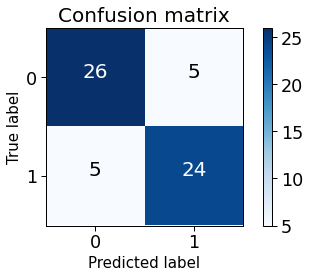

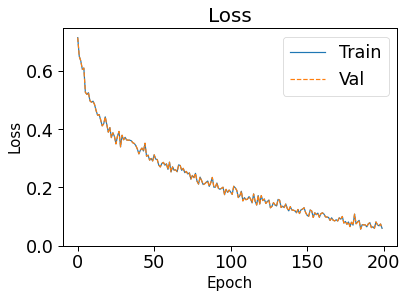

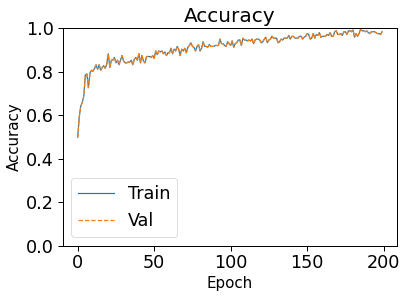

In [0]:
build_run_evaluate_plot( [ Dense(26, activation="relu", input_dim=13), Dense(26, activation="relu"), Dropout(0.5) ],'Adam',200)

Doubled the number of neurons to 52 <br>
**Step 7:** Two Hidden Layers, 52 Neurons, Dropout 0.5, Optimizer Adam, Epoch 200, Accuracy 78.33% <br>
**Result:** Accuracy reduced and Overfitting

Epoch 1/200
237/237 [==============================] - 0s 547us/step - loss: 0.6254 - accuracy: 0.6793
Epoch 2/200
237/237 [==============================] - 0s 79us/step - loss: 0.5520 - accuracy: 0.7595
Epoch 3/200
237/237 [==============================] - 0s 84us/step - loss: 0.4785 - accuracy: 0.8059
Epoch 4/200
237/237 [==============================] - 0s 77us/step - loss: 0.4569 - accuracy: 0.8059
Epoch 5/200
237/237 [==============================] - 0s 71us/step - loss: 0.4221 - accuracy: 0.8101
Epoch 6/200
237/237 [==============================] - 0s 68us/step - loss: 0.4330 - accuracy: 0.8101
Epoch 7/200
237/237 [==============================] - 0s 63us/step - loss: 0.3982 - accuracy: 0.8228
Epoch 8/200
237/237 [==============================] - 0s 71us/step - loss: 0.3655 - accuracy: 0.8397
Epoch 9/200
237/237 [==============================] - 0s 62us/step - loss: 0.3981 - accuracy: 0.8397
Epoch 10/200
237/237 [==============================] - 0s 66us/step - loss: 0.37

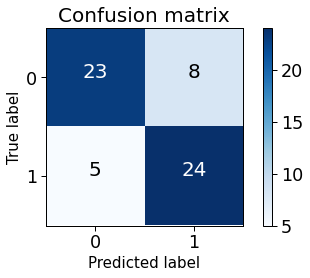

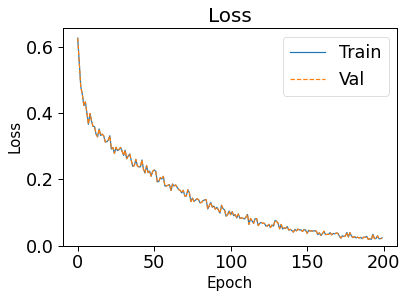

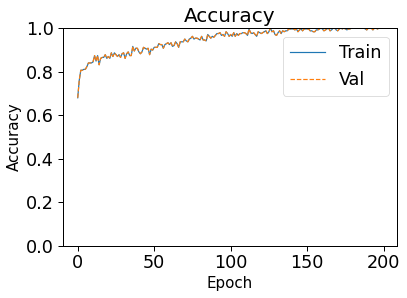

In [0]:
build_run_evaluate_plot( [ Dense(52, activation="relu", input_dim=13), Dense(52, activation="relu"), Dropout(0.5) ],'Adam',200)

Changing the optimizer to Stochastic Gradient Descent <br>
**Step 8:** Two Hidden Layers, 26 Neurons, Dropout 0.5, Optimizer SGD, Epoch 200, Accuracy 85% <br>
**Result:** Improvement of 5% over the previous best (80%)

Epoch 1/200
237/237 [==============================] - 0s 398us/step - loss: 0.7043 - accuracy: 0.5443
Epoch 2/200
237/237 [==============================] - 0s 64us/step - loss: 0.7251 - accuracy: 0.4810
Epoch 3/200
237/237 [==============================] - 0s 57us/step - loss: 0.6922 - accuracy: 0.5527
Epoch 4/200
237/237 [==============================] - 0s 56us/step - loss: 0.6815 - accuracy: 0.5527
Epoch 5/200
237/237 [==============================] - 0s 52us/step - loss: 0.6629 - accuracy: 0.5865
Epoch 6/200
237/237 [==============================] - 0s 54us/step - loss: 0.6915 - accuracy: 0.5443
Epoch 7/200
237/237 [==============================] - 0s 55us/step - loss: 0.6524 - accuracy: 0.5781
Epoch 8/200
237/237 [==============================] - 0s 54us/step - loss: 0.6577 - accuracy: 0.5907
Epoch 9/200
237/237 [==============================] - 0s 56us/step - loss: 0.6206 - accuracy: 0.6624
Epoch 10/200
237/237 [==============================] - 0s 55us/step - loss: 0.64

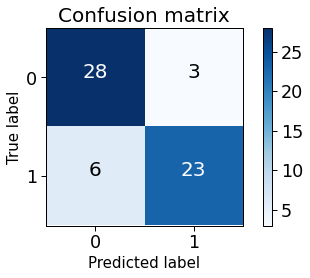

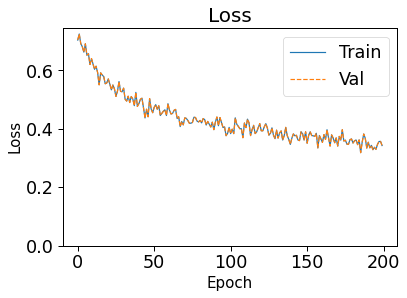

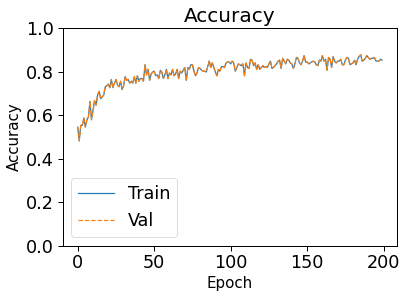

In [0]:
build_run_evaluate_plot( [ Dense(26, activation="relu", input_dim=13), Dense(26, activation="relu"), Dropout(0.5) ],'SGD',200)

Changing the optimizer to RMSprop <br>
**Step 9:** Two Hidden Layers, 26 Neurons, Dropout 0.5, Optimizer RMSprop, Epoch 200, Accuracy 78.33% <br>
**Result:** Accuracy Reduced

Epoch 1/200
237/237 [==============================] - 0s 500us/step - loss: 0.6645 - accuracy: 0.5781
Epoch 2/200
237/237 [==============================] - 0s 64us/step - loss: 0.5797 - accuracy: 0.6582
Epoch 3/200
237/237 [==============================] - 0s 55us/step - loss: 0.5702 - accuracy: 0.7131
Epoch 4/200
237/237 [==============================] - 0s 54us/step - loss: 0.5340 - accuracy: 0.7384
Epoch 5/200
237/237 [==============================] - 0s 60us/step - loss: 0.5322 - accuracy: 0.7173
Epoch 6/200
237/237 [==============================] - 0s 55us/step - loss: 0.5064 - accuracy: 0.7764
Epoch 7/200
237/237 [==============================] - 0s 56us/step - loss: 0.4868 - accuracy: 0.7637
Epoch 8/200
237/237 [==============================] - 0s 53us/step - loss: 0.5025 - accuracy: 0.7722
Epoch 9/200
237/237 [==============================] - 0s 54us/step - loss: 0.4725 - accuracy: 0.8017
Epoch 10/200
237/237 [==============================] - 0s 56us/step - loss: 0.45

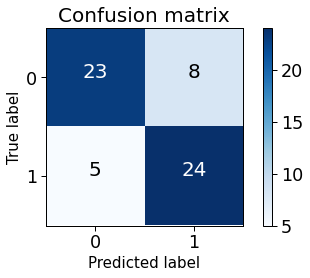

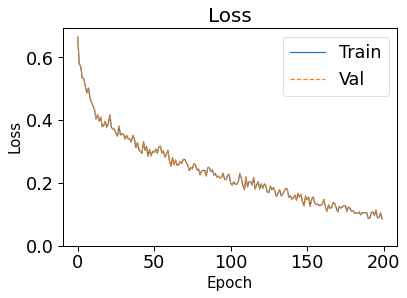

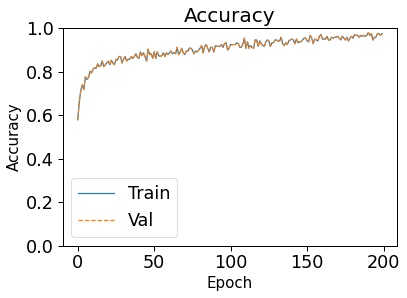

In [0]:
build_run_evaluate_plot( [ Dense(26, activation="relu", input_dim=13), Dense(26, activation="relu"), Dropout(0.5) ],'RMSprop',200)

Confirmed that SGD best suits our problem <br>
**Step 10:** Two Hidden Layers, 26 Neurons,Two Dropout layers 0.5 each, Optimizer SGD, Epoch 200, Accuracy 83.33% <br>
**Result:** Improvement of 3.33% over step 8

Epoch 1/200
237/237 [==============================] - 0s 490us/step - loss: 0.8466 - accuracy: 0.4852
Epoch 2/200
237/237 [==============================] - 0s 66us/step - loss: 0.7239 - accuracy: 0.5907
Epoch 3/200
237/237 [==============================] - 0s 57us/step - loss: 0.7623 - accuracy: 0.6118
Epoch 4/200
237/237 [==============================] - 0s 61us/step - loss: 0.7426 - accuracy: 0.5738
Epoch 5/200
237/237 [==============================] - 0s 58us/step - loss: 0.6870 - accuracy: 0.6118
Epoch 6/200
237/237 [==============================] - 0s 58us/step - loss: 0.6946 - accuracy: 0.5738
Epoch 7/200
237/237 [==============================] - 0s 66us/step - loss: 0.6957 - accuracy: 0.6203
Epoch 8/200
237/237 [==============================] - 0s 58us/step - loss: 0.6791 - accuracy: 0.5949
Epoch 9/200
237/237 [==============================] - 0s 56us/step - loss: 0.6431 - accuracy: 0.6624
Epoch 10/200
237/237 [==============================] - 0s 54us/step - loss: 0.63

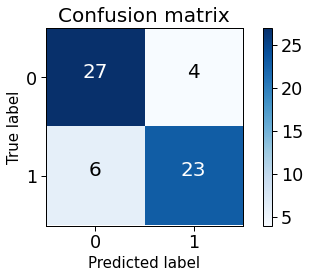

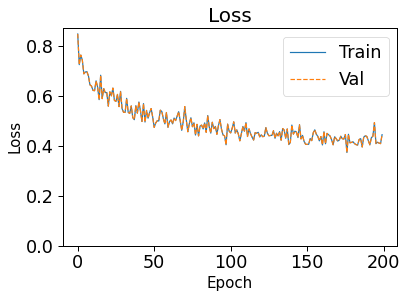

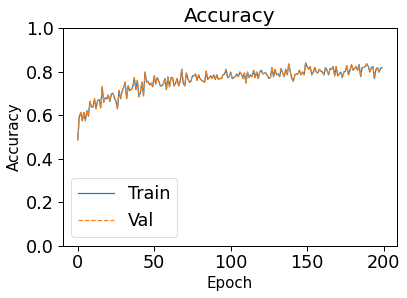

In [0]:
build_run_evaluate_plot( [ Dense(26, activation="relu", input_dim=13), Dropout(0.5), Dense(26, activation="relu"), Dropout(0.5) ],'SGD',200)

Added another hidden layer of 26 neurons <br>
**Step 11:** Three Hidden Layers, 26 Neurons,Two Dropout layers 0.5 each, Optimizer SGD, Epoch 200, Accuracy 88.33% <br>
**Result:** Drastic Improvement of 5% over step 10

Epoch 1/200
237/237 [==============================] - 0s 508us/step - loss: 0.7694 - accuracy: 0.4093
Epoch 2/200
237/237 [==============================] - 0s 57us/step - loss: 0.7486 - accuracy: 0.5021
Epoch 3/200
237/237 [==============================] - 0s 56us/step - loss: 0.7296 - accuracy: 0.4726
Epoch 4/200
237/237 [==============================] - 0s 75us/step - loss: 0.7230 - accuracy: 0.5274
Epoch 5/200
237/237 [==============================] - 0s 68us/step - loss: 0.6994 - accuracy: 0.5443
Epoch 6/200
237/237 [==============================] - 0s 58us/step - loss: 0.7332 - accuracy: 0.4979
Epoch 7/200
237/237 [==============================] - 0s 60us/step - loss: 0.7105 - accuracy: 0.5105
Epoch 8/200
237/237 [==============================] - 0s 63us/step - loss: 0.6793 - accuracy: 0.5570
Epoch 9/200
237/237 [==============================] - 0s 68us/step - loss: 0.7098 - accuracy: 0.5443
Epoch 10/200
237/237 [==============================] - 0s 74us/step - loss: 0.67

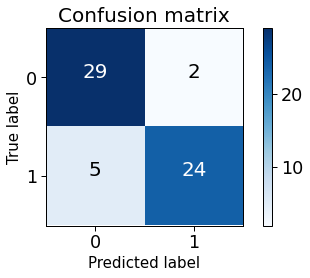

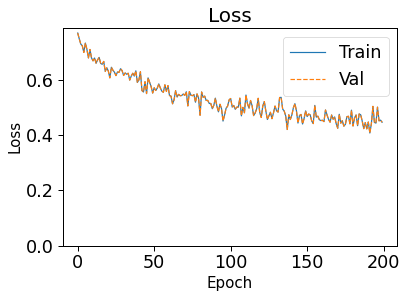

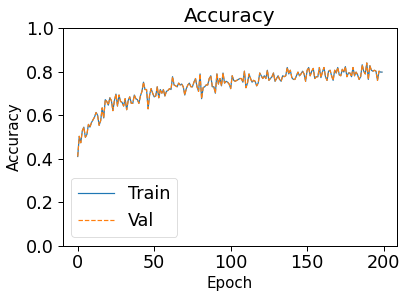

In [0]:
build_run_evaluate_plot( [ Dense(26, activation="relu", input_dim=13), 
                          Dropout(0.5), Dense(26, activation="relu"), 
                          Dropout(0.5), Dense(26, activation="relu")
                           ],'SGD',200)

Added another dropout layer with 30% neurons dropped out <br>
**Step 12:** Three Hidden Layers, 26 Neurons,Two Dropout layers 0.5 each and 0.3, Optimizer SGD, Epoch 200, Accuracy 86.67%<br>
**Result:** Accuracy Reduced

Epoch 1/200
237/237 [==============================] - 0s 658us/step - loss: 0.7824 - accuracy: 0.5021
Epoch 2/200
237/237 [==============================] - 0s 59us/step - loss: 0.8250 - accuracy: 0.4262
Epoch 3/200
237/237 [==============================] - 0s 58us/step - loss: 0.7749 - accuracy: 0.4937
Epoch 4/200
237/237 [==============================] - 0s 71us/step - loss: 0.7228 - accuracy: 0.5612
Epoch 5/200
237/237 [==============================] - 0s 84us/step - loss: 0.7255 - accuracy: 0.5359
Epoch 6/200
237/237 [==============================] - 0s 85us/step - loss: 0.7392 - accuracy: 0.5190
Epoch 7/200
237/237 [==============================] - 0s 60us/step - loss: 0.7429 - accuracy: 0.5105
Epoch 8/200
237/237 [==============================] - 0s 65us/step - loss: 0.7380 - accuracy: 0.5316
Epoch 9/200
237/237 [==============================] - 0s 59us/step - loss: 0.7167 - accuracy: 0.5063
Epoch 10/200
237/237 [==============================] - 0s 58us/step - loss: 0.74

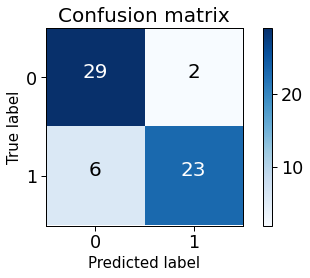

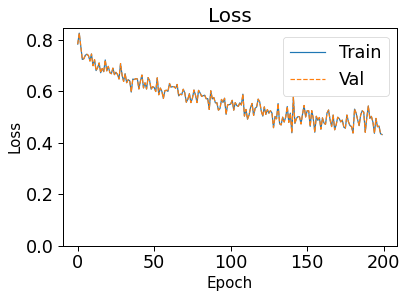

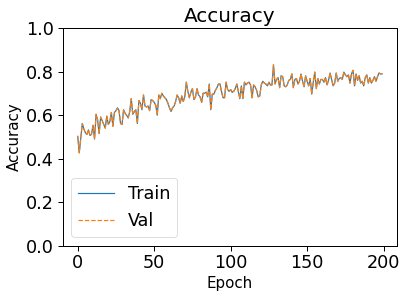

In [0]:
build_run_evaluate_plot( [ Dense(26, activation="relu", input_dim=13), 
                          Dropout(0.5), Dense(26, activation="relu"), 
                          Dropout(0.5), Dense(26, activation="relu"), 
                          Dropout(0.3)],'SGD',200)

Increasing the number of dropouts to 50% <br>
**Step 13:** Three Hidden Layers, 26 Neurons,Three Dropout layers 0.5, Optimizer SGD, Epoch 200, Accuracy 76.66%<br>
**Result:** Accuracy Reduced

Epoch 1/200
237/237 [==============================] - 0s 593us/step - loss: 0.7764 - accuracy: 0.4937
Epoch 2/200
237/237 [==============================] - 0s 63us/step - loss: 0.8164 - accuracy: 0.4684
Epoch 3/200
237/237 [==============================] - 0s 59us/step - loss: 0.8445 - accuracy: 0.4641
Epoch 4/200
237/237 [==============================] - 0s 72us/step - loss: 0.7878 - accuracy: 0.5232
Epoch 5/200
237/237 [==============================] - 0s 66us/step - loss: 0.7583 - accuracy: 0.5696
Epoch 6/200
237/237 [==============================] - 0s 69us/step - loss: 0.7385 - accuracy: 0.5021
Epoch 7/200
237/237 [==============================] - 0s 66us/step - loss: 0.7978 - accuracy: 0.5063
Epoch 8/200
237/237 [==============================] - 0s 72us/step - loss: 0.8141 - accuracy: 0.5063
Epoch 9/200
237/237 [==============================] - 0s 61us/step - loss: 0.7471 - accuracy: 0.5485
Epoch 10/200
237/237 [==============================] - 0s 59us/step - loss: 0.71

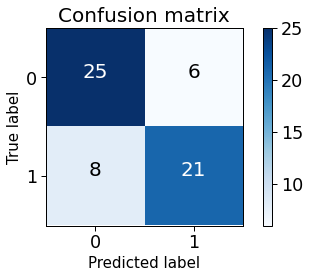

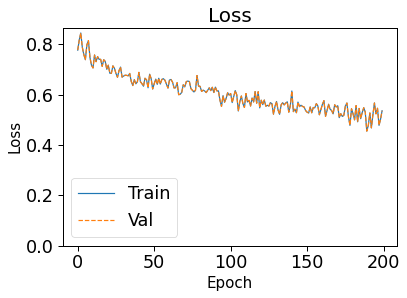

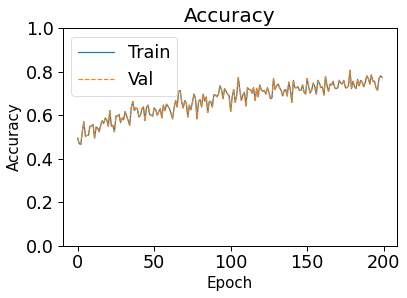

In [0]:
build_run_evaluate_plot( [ Dense(26, activation="relu", input_dim=13), 
                          Dropout(0.5), Dense(26, activation="relu"), 
                          Dropout(0.5), Dense(26, activation="relu"), 
                          Dropout(0.5)],'SGD',200)

Adding another hidden layer of 26 neurons <br>
**Step 14:** Four Hidden Layers, 26 Neurons,Three Dropout layers 0.5 each , Optimizer SGD, Epoch 200, Accuracy 83.33%<br>
**Result:** Not the best accuracy

Epoch 1/200
237/237 [==============================] - 0s 703us/step - loss: 0.6973 - accuracy: 0.5401
Epoch 2/200
237/237 [==============================] - 0s 59us/step - loss: 0.6834 - accuracy: 0.5232
Epoch 3/200
237/237 [==============================] - 0s 66us/step - loss: 0.6881 - accuracy: 0.5401
Epoch 4/200
237/237 [==============================] - 0s 68us/step - loss: 0.6816 - accuracy: 0.4937
Epoch 5/200
237/237 [==============================] - 0s 64us/step - loss: 0.6639 - accuracy: 0.5696
Epoch 6/200
237/237 [==============================] - 0s 59us/step - loss: 0.6920 - accuracy: 0.5654
Epoch 7/200
237/237 [==============================] - 0s 60us/step - loss: 0.6833 - accuracy: 0.5443
Epoch 8/200
237/237 [==============================] - 0s 58us/step - loss: 0.6777 - accuracy: 0.5823
Epoch 9/200
237/237 [==============================] - 0s 59us/step - loss: 0.6693 - accuracy: 0.5949
Epoch 10/200
237/237 [==============================] - 0s 58us/step - loss: 0.68

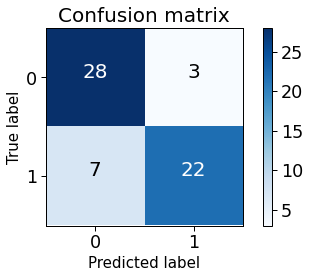

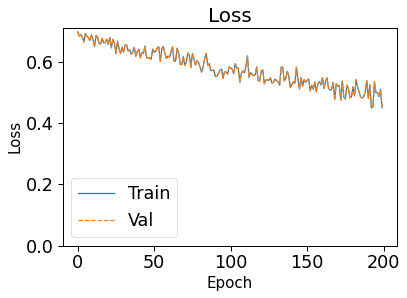

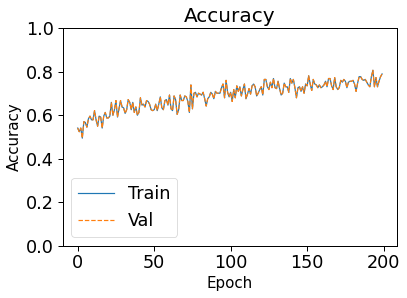

In [0]:
build_run_evaluate_plot( [ Dense(26, activation="relu", input_dim=13), 
                          Dropout(0.5), Dense(26, activation="relu"), 
                          Dropout(0.5), Dense(26, activation="relu"), 
                          Dropout(0.5),Dense(26, activation="relu")],'SGD',200)

Changing the activation function to elu <br>
**Step 15:** Four Hidden Layers, 26 Neurons,Three Dropout layers 0.5 each, Optimizer SGD, Epoch 200, Accuracy 86.66%<br>
**Result:** Not the best accuracy

Epoch 1/200
237/237 [==============================] - 0s 666us/step - loss: 0.6848 - accuracy: 0.6118
Epoch 2/200
237/237 [==============================] - 0s 63us/step - loss: 0.7098 - accuracy: 0.5907
Epoch 3/200
237/237 [==============================] - 0s 63us/step - loss: 0.6838 - accuracy: 0.6203
Epoch 4/200
237/237 [==============================] - 0s 66us/step - loss: 0.7690 - accuracy: 0.5148
Epoch 5/200
237/237 [==============================] - 0s 77us/step - loss: 0.6662 - accuracy: 0.6160
Epoch 6/200
237/237 [==============================] - 0s 65us/step - loss: 0.7099 - accuracy: 0.5823
Epoch 7/200
237/237 [==============================] - 0s 62us/step - loss: 0.6724 - accuracy: 0.6160
Epoch 8/200
237/237 [==============================] - 0s 63us/step - loss: 0.6618 - accuracy: 0.5992
Epoch 9/200
237/237 [==============================] - 0s 64us/step - loss: 0.6963 - accuracy: 0.5949
Epoch 10/200
237/237 [==============================] - 0s 64us/step - loss: 0.64

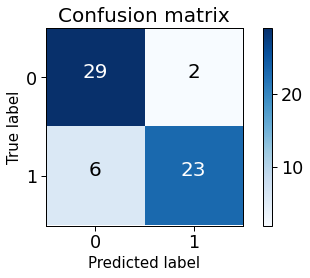

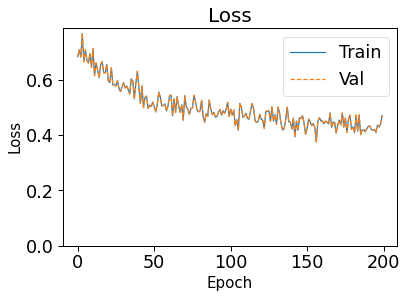

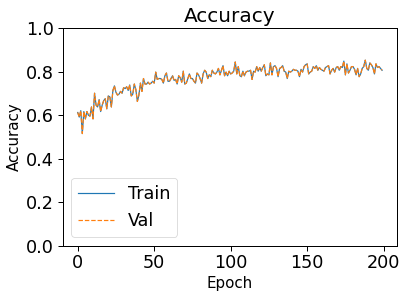

In [0]:
build_run_evaluate_plot( [ Dense(26, activation="elu", input_dim=13), 
                          Dropout(0.5), Dense(26, activation="elu"), 
                          Dropout(0.5), Dense(26, activation="elu"), 
                          Dropout(0.5),Dense(26, activation="elu")],'SGD',200)

Adding another dropout layer with 30% neurons dropped out <br>
**Step 16:** Four Hidden Layers, 26 Neurons,Three Dropout layers 0.5 each and last 0.3, Optimizer SGD, Epoch 200, Accuracy 86.66%<br>
**Result:** Not the best accuracy

Epoch 1/200
237/237 [==============================] - 0s 634us/step - loss: 1.0509 - accuracy: 0.4768
Epoch 2/200
237/237 [==============================] - 0s 63us/step - loss: 0.9781 - accuracy: 0.4895
Epoch 3/200
237/237 [==============================] - 0s 59us/step - loss: 0.8760 - accuracy: 0.5190
Epoch 4/200
237/237 [==============================] - 0s 79us/step - loss: 0.8343 - accuracy: 0.5781
Epoch 5/200
237/237 [==============================] - 0s 72us/step - loss: 0.8830 - accuracy: 0.5274
Epoch 6/200
237/237 [==============================] - 0s 105us/step - loss: 0.8104 - accuracy: 0.5527
Epoch 7/200
237/237 [==============================] - 0s 68us/step - loss: 0.8077 - accuracy: 0.5696
Epoch 8/200
237/237 [==============================] - 0s 65us/step - loss: 0.7928 - accuracy: 0.5612
Epoch 9/200
237/237 [==============================] - 0s 62us/step - loss: 0.7202 - accuracy: 0.5949
Epoch 10/200
237/237 [==============================] - 0s 62us/step - loss: 0.6

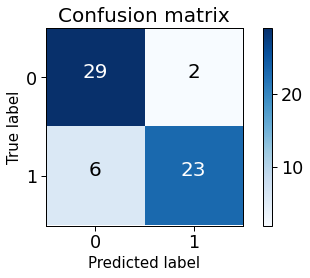

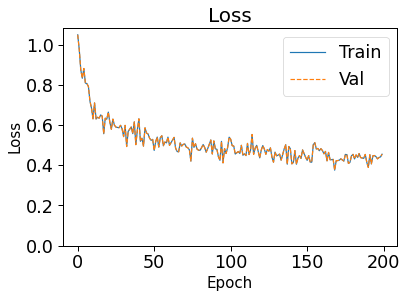

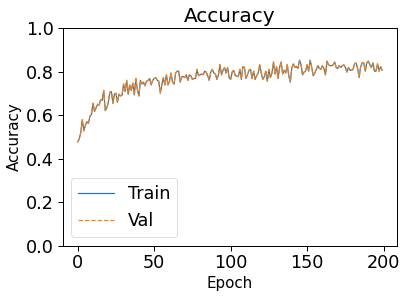

In [0]:
build_run_evaluate_plot( [ Dense(26, activation="elu", input_dim=13), 
                          Dropout(0.5), Dense(26, activation="elu"), 
                          Dropout(0.5), Dense(26, activation="elu"), 
                          Dropout(0.5),Dense(26, activation="elu"), 
                          Dropout(0.3)],'SGD',200)

Doubled the number of neurons to 52<br>
**Step 17:** Four Hidden Layers, 52 Neurons,Three Dropout layers 0.5 each and last 0.3, Optimizer SGD, Epoch 200, Accuracy 86.66%<br>
**Result:** Not the best accuracy

Epoch 1/200
237/237 [==============================] - 0s 666us/step - loss: 0.8018 - accuracy: 0.6076
Epoch 2/200
237/237 [==============================] - 0s 76us/step - loss: 0.8648 - accuracy: 0.4937
Epoch 3/200
237/237 [==============================] - 0s 66us/step - loss: 0.7282 - accuracy: 0.5612
Epoch 4/200
237/237 [==============================] - 0s 80us/step - loss: 0.8367 - accuracy: 0.5443
Epoch 5/200
237/237 [==============================] - 0s 69us/step - loss: 0.7189 - accuracy: 0.6456
Epoch 6/200
237/237 [==============================] - 0s 68us/step - loss: 0.7025 - accuracy: 0.5907
Epoch 7/200
237/237 [==============================] - 0s 76us/step - loss: 0.7000 - accuracy: 0.5907
Epoch 8/200
237/237 [==============================] - 0s 67us/step - loss: 0.6916 - accuracy: 0.6076
Epoch 9/200
237/237 [==============================] - 0s 71us/step - loss: 0.6092 - accuracy: 0.6751
Epoch 10/200
237/237 [==============================] - 0s 91us/step - loss: 0.59

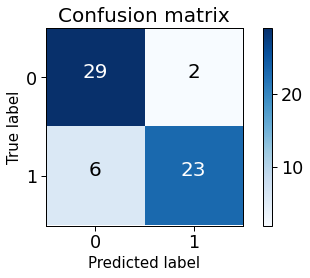

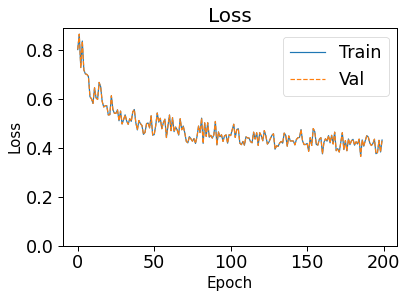

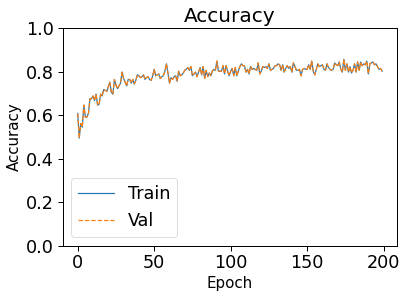

In [0]:
build_run_evaluate_plot( [ Dense(52, activation="elu", input_dim=13), 
                          Dropout(0.5), Dense(52, activation="elu"), 
                          Dropout(0.5), Dense(52, activation="elu"), 
                          Dropout(0.5),Dense(52, activation="elu"), 
                          Dropout(0.3)],'SGD',200)

# Final Verdict

So an Artifical Neural Network was built,trained,tested,evaluated and improved.Though we started with an accuracy of 78.33%, we tuned the parameters continuously to achieve the best possible accuracy of **88.33%**. Configuration in **Step 11** gave the best accuracy. After this limit, the accuracy didn't improve whatever we tried. This is an indication that we should stop. Hence, we concluded the process and started to explore accuracy improvements through other techniques.

# Ensemble Learning

Ensemble Learning is another powerful technique that can give us great results. It is the process of using multiple models to make predictions and then coming to a conclusion after considering predictions made by all the models in the ensemble. This allows the weakness of one model to be compensated by another. 

**Bagging** is a technique in which prediction of multiple models are averaged to give the actual prediction of the ensemble. I have used BaggingClassifier which takes multiple estimators of same type and VotingClassifier which combines different estimators together to give final prediction.

In [0]:
#creating instances of classifiers to be used in the ensemble
lr = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier(n_estimators=100)
nb = GaussianNB()
dt = DecisionTreeClassifier()

In [0]:
#voting classifier which combines four different estimators
evc = VotingClassifier(estimators=[('svm',svm),('nb',nb),('rf',rf),('lr',lr)], voting='hard')
evc.fit(X_train,y_train)
evc.score(X_test,y_test)

0.8666666666666667

In [0]:
#bagging classifier with 100 random forest estimators
bg = BaggingClassifier(rf, max_samples=0.6, max_features=1.0, n_estimators=100)
bg.fit(X_train, y_train)
bg.score(X_test, y_test)

0.85

In [0]:
#bagging classifier with 100 support vector machine estimators
bg = BaggingClassifier(svm, max_samples=0.6, max_features=1.0, n_estimators=100)
bg.fit(X_train, y_train)
bg.score(X_test, y_test)

0.9

Bagging did the trick! We were able to achieve our all time best average of **90%** by using a bagging classifier of 100 support vector machines.

# Conclusion

We have reached the end of this experiment. Throughout this experiment, we used different models and techniques to achieve better accuracy. I would like to consolidate the models and techniques used into the following:

1) Non-Deep Learning Models <br>
2) Deep Learning Model <br>
3) Ensemble Learning

Each successive models provided better accuracy than its predecessor.

1) Logistic Regression (86.66%) <br>
2) Neural Network (88.33%) <br>
3) Bagging SVM (90%)

This is not the end. There is still a lot of scope for improvement(10%). In addition to these methods, I wanted to do feature selection using backward feature elimination and then apply this ensemble model to the resultant data to get better accuracy. But I couldn't achieve it in this timeframe. A shoutout to all future researchers taking this task - Please start the process by extracting features and then make best use of ensemble techniques like bagging and boosting to achieve better accuracy faster.